# Résolution du voyageur de commerce avec des fourmis

In [1]:
import math
import random
import numpy as np
import pandas as pd
import statistics

## Initialisation

In [2]:
# Initializing parameters
Q = 1000
alpha = 1
beta = 1
gamma = 0
parameters = [Q, alpha, beta, gamma]


cities_names = ["Bordeaux","Paris","Nice","Lyon","Nantes","Brest","Lille","Clermont-Ferrand","Strasbourg","Poitiers","Angers","Montpellier","Caen","Rennes","Pau"]

cities = {"Bordeaux": [-2,-1.8],
           "Paris": [-0.1,2.2],
           "Nice": [3.5,-3],
           "Lyon": [1.6,-1.1],
           "Nantes": [-2.6,0.4],
           "Brest": [-4.5,1.4],
           "Lille": [0.4,4],
           "Clermont-Ferrand": [0.6,-1.2],
           "Strasbourg": [3.6,1.8],
           "Poitiers": [-1.4,-0.2],
           "Angers": [-2,0.8],
           "Montpellier": [0.8,-3.2],
           "Caen": [-1.8,2.4],
           "Rennes": [-2.8,1.4],
           "Pau": [-2,-3.4] }

# matrice d'adjacence des distances / phéromones (ce sont en fait des dict{})
dist_matrix = {i+j:0 for i in cities for j in cities}       # ex: {GrenobleLyon : 100, LyonMarseille : 200, ...}
pheromone_matrix= {i+j:1 for i in cities for j in cities}   # ex: {GrenobleLyon : 25, LyonMarseille : 10, ...}
phero_count=sum(pheromone_matrix[i] for i in pheromone_matrix)

def distance(a,b):
    (x1,y1),(x2,y2) = (a,b)
    return np.sqrt((x1-x2)**2+(y1-y2)**2) 

for i in cities:
    for j in cities:
        dist_matrix[i+j] = distance(cities[i],cities[j])

## Training

In [3]:
def updatePheromones(pheromone_matrix,villes_visitees,total_dist,phero_count,parameters,**kwargs):
    """
    Method which updates the pheromone matrix to the ant travell
    """
    Q,alpha,beta,gamma=parameters
    dissipation_rate = kwargs.get('dissipation_rate',0.1)
    # add pheromones on the path that was taken -> change values of pheromone_matrix
    for i in range(len(villes_visitees)-1):
        pheromone_matrix[villes_visitees[i]+villes_visitees[i+1]]=pheromone_matrix[villes_visitees[i]+villes_visitees[i+1]] + Q/(total_dist)**2

    # dissipate pheromones
    pheromone_matrix = { k: v*(1-dissipation_rate) for k,v in pheromone_matrix.items() }

    new_phero_count = sum(pheromone_matrix[i] for i in pheromone_matrix)

    # equilibrate the matrix -> sum of pheromones == initial phero_count
    pheromone_matrix = { k: v*phero_count/new_phero_count for k,v in pheromone_matrix.items() }

    return pheromone_matrix


def sendAgent(villes_visitees,villes_restantes,parameters):
    """
    Sends an agent through the world.
    Returns the travelled distance
    """
    Q,alpha,beta,gamma=parameters
    total_dist=0
    while len(villes_visitees) < len(cities):
        # tot is the sum of visibility*intensity ie. phero/distance+gamma for each city
        # visibility = 1/distance
        # intensity = refers to pheromones
        tot = sum(pheromone_matrix[villes_visitees[len(villes_visitees)-1]+ville]**beta
                    / (dist_matrix[villes_visitees[len(villes_visitees)-1]+ville])**alpha
                    + gamma
                    for ville in villes_restantes)
        
        # computation of the probability for each city to be picked        
        probs=list(map(lambda x:(pheromone_matrix[villes_visitees[len(villes_visitees)-1]+x]**beta / (dist_matrix[villes_visitees[len(villes_visitees)-1]+x])**alpha + gamma) /tot, villes_restantes))

        # pick the next city     
        next_ville=np.random.choice(villes_restantes, p=probs)
        
        # update distance & cities
        total_dist = total_dist + dist_matrix[next_ville+villes_visitees[len(villes_visitees)-1]]
        villes_visitees.append(next_ville)
        villes_restantes.remove(next_ville)
        
    return total_dist


def ProceedToResearch(parameters,**kwargs):
    """
    Sends agents to explore the world.
    Returns the list of recorded total_distances
    """
    numberOfAgents=kwargs.get("numberOfAgents",200)
    verbose = kwargs.get("verbose",0)
    dissipation_rate = kwargs.get("dissipation_rate",.1)
    record_dist=[]
    pheromone_matrix= {i+j:1 for i in cities for j in cities}

    for i in range(numberOfAgents):        
        villes_visitees=['Bordeaux']
        villes_restantes = cities_names.copy()
        villes_restantes.remove('Bordeaux')
        
        total_dist = sendAgent(villes_visitees,villes_restantes,parameters)
        record_dist.append(total_dist)
        
        # update pheromones in  pheromone_matrix:
        pheromone_matrix=updatePheromones(pheromone_matrix,villes_visitees,total_dist,phero_count,parameters,dissipation_rate=dissipation_rate)

        if verbose>1:
            print("\n======== NOUVELLE FOURMI ========")
            print(villes_visitees,total_dist)
    if verbose>0: print("Shortest distance found was : " + str(min(record_dist)))

    return record_dist,pheromone_matrix


### EXECUTION ###
record_dist,mat_pheromone = ProceedToResearch(parameters,numberOfAgents=1000,verbose=1)
print(sum(mat_pheromone[i] for i in mat_pheromone))
print(sum(pheromone_matrix[i] for i in pheromone_matrix))
mat_pheromone

Shortest distance found was : 36.34875447946365
225.00000000000023
225


{'BordeauxBordeaux': 2.8477120143084374e-11,
 'BordeauxParis': 0.3908639880953446,
 'BordeauxNice': 0.37687231758192713,
 'BordeauxLyon': 0.9584287331818614,
 'BordeauxNantes': 1.5253186822699396,
 'BordeauxBrest': 0.6089182783112581,
 'BordeauxLille': 0.2611700276049738,
 'BordeauxClermont-Ferrand': 0.6391226071132156,
 'BordeauxStrasbourg': 0.8300192018750706,
 'BordeauxPoitiers': 2.9246540695614707,
 'BordeauxAngers': 1.301917547274373,
 'BordeauxMontpellier': 1.381988473473683,
 'BordeauxCaen': 0.8546543236880508,
 'BordeauxRennes': 2.3087682809407077,
 'BordeauxPau': 1.708732040397717,
 'ParisBordeaux': 2.8477120143084374e-11,
 'ParisParis': 2.8477120143084374e-11,
 'ParisNice': 1.0073291808814595,
 'ParisLyon': 0.8506451580477915,
 'ParisNantes': 1.942267554456773,
 'ParisBrest': 1.466236355656887,
 'ParisLille': 2.3905515466506477,
 'ParisClermont-Ferrand': 1.1885753766314697,
 'ParisStrasbourg': 1.739180014455503,
 'ParisPoitiers': 1.1453070027284042,
 'ParisAngers': 0.51020700

## Performance control

Mean of last chunk over 20 is : 50.855818054153175


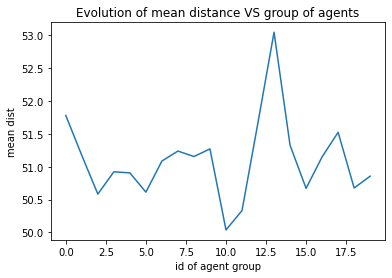

In [4]:
def chunkIt(seq, nb_chunks):
    """
    function used to split a sequence into n parts
    found it on the web
    """
    avg = len(seq) / float(nb_chunks)
    out = []
    last = 0.0

    while last < len(seq):
        out.append(seq[int(last):int(last + avg)])
        last += avg

    return out

def RatePerformance(record_dist,**kwargs):
    """
    Rate corresponds to the mean of the last chunk of agents sent to explore the world
    """
    nb_chunks = kwargs.get('nb_chunks',20)
    verbose = kwargs.get('verbose',False)
    # here we chose the last chunk's mean as rate
    rate = statistics.mean(chunkIt(record_dist, nb_chunks)[nb_chunks-1])
    if verbose>0: print(f"Shortest distance found was : {min(record_dist)} with index {record_dist.index(min(record_dist))} out of {len(record_dist)}")
    return rate

### EXECUTION ###
agent_squads=[i for i in range(20)]
mean_agents_squads=[]
chunks = chunkIt(record_dist,20)
for sublist in chunks:
    mean_agents_squads.append(statistics.mean(sublist))

df=pd.DataFrame(mean_agents_squads,agent_squads)
df.plot.line(title="Evolution of mean distance VS group of agents", xlabel="id of agent group",ylabel="mean dist",legend=False)

print(f"Mean of last chunk over 20 is : {RatePerformance(record_dist)}")

Global performance of a group doesn't seem to increase with time (first groups are as bad as last ones)

computing research with sample size 100
computing research with sample size 200
computing research with sample size 350
computing research with sample size 500
computing research with sample size 750
computing research with sample size 1000


<AxesSubplot:title={'center':'Evolution of shortest distance when using more agents'}, xlabel='numberOfAgents', ylabel='mean shortest_dist'>

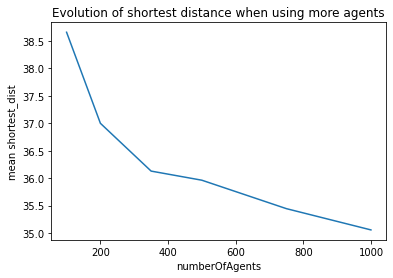

In [5]:
x=[100,200,350,500,750,1000]
y=[0]*len(x)

for nb_agents in x:
    print(f"computing research with sample size {nb_agents}")
    tmp_dist=[]
    for i in range(20):
        dist,_=ProceedToResearch(parameters,numberOfAgents=nb_agents,verbose=0)
        tmp_dist.append(min(dist))
    y[x.index(nb_agents)]=statistics.mean(tmp_dist)

df = pd.DataFrame(y,x)

df.plot.line(title="Evolution of shortest distance when using more agents", xlabel="numberOfAgents",ylabel="mean shortest_dist",legend=False)

computing research over 20 samples with Q = 10
computing research over 20 samples with Q = 25
computing research over 20 samples with Q = 50
computing research over 20 samples with Q = 75
computing research over 20 samples with Q = 100
computing research over 20 samples with Q = 250
computing research over 20 samples with Q = 500
computing research over 20 samples with Q = 1000


<AxesSubplot:title={'center':'Evolution of shortest distance when varying Q'}, xlabel='Q value', ylabel='shortest_dist'>

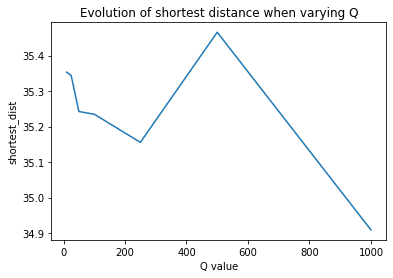

In [6]:
x=[10,25,50,75,100,250,500,1000]
y=[0]*len(x)
parameters=[0,1,1,0]

for Q in x:
    print(f"computing research over 20 samples with Q = {Q}")
    tmp_dist=[]
    parameters[0]=Q
    for i in range(50):
        dist,_=ProceedToResearch(parameters,numberOfAgents=1000,verbose=0)
        tmp_dist.append(min(dist))
    y[x.index(Q)]=statistics.mean(tmp_dist)

df = pd.DataFrame(y,x)

df.plot.line(title="Evolution of shortest distance when varying Q", xlabel="Q value",ylabel="shortest_dist",legend=False)

computing research over 20 samples with dissipation_rate = 0.05
computing research over 20 samples with dissipation_rate = 0.1
computing research over 20 samples with dissipation_rate = 0.2
computing research over 20 samples with dissipation_rate = 0.3
computing research over 20 samples with dissipation_rate = 0.4
computing research over 20 samples with dissipation_rate = 0.5
computing research over 20 samples with dissipation_rate = 0.6
computing research over 20 samples with dissipation_rate = 0.7


<AxesSubplot:title={'center':'Evolution of shortest distance when varying dissipation_rate'}, xlabel='dissipation_rate', ylabel='shortest_dist'>

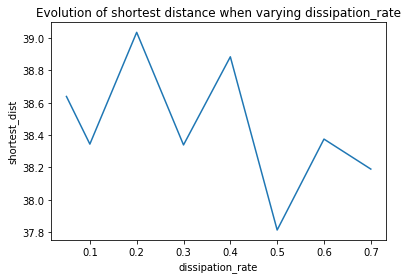

In [7]:
x=[.05,.1,.2,.3,.4,.5,.6,.7]
y=[0]*len(x)
parameters=[100,1,1,0]

for dissipation_rate in x:
    print(f"computing research over 20 samples with dissipation_rate = {dissipation_rate}")
    tmp_dist=[]
    parameters[0]=dissipation_rate
    for i in range(50):
        dist,_=ProceedToResearch(parameters,numberOfAgents=100,verbose=0,dissipation_rate=dissipation_rate)
        tmp_dist.append(min(dist))
    y[x.index(dissipation_rate)]=statistics.mean(tmp_dist)

df = pd.DataFrame(y,x)

df.plot.line(title="Evolution of shortest distance when varying dissipation_rate", xlabel="dissipation_rate",ylabel="shortest_dist",legend=False)

## Parameter Research with Genetic Algorithm

https://towardsdatascience.com/genetic-algorithm-to-optimize-machine-learning-hyperparameters-72bd6e2596fc

1 — Initialization: create an initial population with NP vectors with random parameter values within boundaries.

2 — Initial evaluation: calculate function value for the NP vectors.

3 — For each vector in the population:
* 3.1 — Mutation: we build a mutant vector, where each parameter’s value is calculated as a mutation of the parameters of other vectors randomly chosen from the population. A common strategy to calculate this mutant vector is best1bin, where each parameter pᵢ of the mutant vector is calculated as shown in the Equation below. The mutant parameter is a variation of the pᵢ parameter of the best vector (vector with the lowest value) plus a mutation rate (F) times the pᵢ-difference of two vectors randomly chosen, r₁ and r₂.
* 3.2 — Recombination: a trial vector is created by selecting each of its parameters as either the value of the current vector or the value of the mutant vector. For each parameter, we generate a random uniform number R in the (0,1) interval. If R is lower than a recombination rate, then we accept the mutant parameter; otherwise, we use the parameter of the current parameter.
* 3.3 — Replacement: evaluate the function of the trial vector. If it’s more stable than the current one, substitute the current vector by the trial vector.


4 — Repeat Step 3 until population convergence: iteration stops when the standard deviation of the function within the population is smaller than a specific percentage of the mean value of the function. Loop also stops if convergence is not reached after a maximum number of iterations.

### Initialization & Evaluation

In [8]:
def SortPopulation(parameter_population,rates):
    """
    Sorts by rate the population of parameters
    """ 
    sorted_zipped_lists = sorted(zip(rates,parameter_population))
    parameter_population = [element for _, element in sorted_zipped_lists]
    return parameter_population,sorted(rates)


# Initialization
# Some variables
nb_individuals = 100
numberOfAgents = 100
nb_chunks=numberOfAgents/5

# Vector population -> [Q, alpha, beta, gamma]
parameter_population = [[random.randint(1,200), random.randint(-5,5), random.randint(-5,5), random.randint(1,5)] for i in range(0,nb_individuals)]

# Initial Evaluation
rates=[RatePerformance(ProceedToResearch(parameters,numberOfAgents=numberOfAgents,verbose=0,nb_chunks=nb_chunks)[0]) for parameters in parameter_population]
parameter_population,rates=SortPopulation(parameter_population,rates)
initial_best_param,initial_best_rate = parameter_population[0],min(rates)

print(f"Best rate within init list of params is {initial_best_rate} with values {initial_best_param}")

Best rate within init list of params is 52.16801407351475 with values [200, 1, -5, 3]


In [9]:
df_parameter_population = pd.DataFrame(parameter_population,columns=['Q','alpha','beta','gamma'])
df_parameter_population.insert(0,'rate',rates)
df_parameter_population.sort_values('rate')

,rate,Q,alpha,beta,gamma
0,52.168014,200,1,-5,3
1,54.246178,139,3,2,4
2,56.013292,75,2,0,2
3,56.087111,75,5,-3,3
4,56.185617,15,1,2,4
...,...,...,...,...,...
95,75.042263,113,-4,2,3
96,75.130162,45,-4,-2,2
97,75.224667,160,-5,-4,3
98,75.373314,162,-5,-5,2


### Mutation

In [10]:
def PerformMutation(parameter_population,**kwargs):
    """
    Mutates a population of parameters sorted by performance () 
    """
    new_parameter_population = []
    F = kwargs.get('F',.5)
    pi_best_size=kwargs.get('pi_best_size',5)
    numberOfAgents=kwargs.get('numberOfAgents',100)
    verbose=kwargs.get('verbose',0)

    for i in range(nb_individuals):
        #pi_best = parameter_population[:pi_best_size][np.random.choice([0,1,2,3,4], p=[.5,.25,.125,.075,.05])]
        #pi_best=parameter_population[random.randint(0,pi_best_size)]
        
        #pick random with 1/quadratic distrib
        #rnd = pi_best_size-1-int(math.sqrt(random.randint(0,pi_best_size**2)))
        rnd = random.randint(0,pi_best_size)

        # print(rnd)
        pi_best=parameter_population[rnd]

        pi_mut=[]
        
        ## classic genetic algo : results are not satisfying
        # r1=random.randint(0,nb_individuals-1)
        # r2=random.randint(0,nb_individuals-1)
        # pi_r1 = parameter_population[r1]
        # pi_r2 = parameter_population[r2]
        # for i in range(int(len(pi_best)/2)):
        #     val = pi_best[i] + F * (pi_r1[i] - pi_r2[i])
        #     if val>0:
        #         pi_mut.append(val)
        #     else:
        #         pi_mut.append(pi_best[i] + F * abs(pi_r1[i] - pi_r2[i]))

        # algo : 1+alpha
        # vector = [F*random.randint(-10,10)/100 for i in range(0,4)]
        vector = [F/100 for i in range(0,4)]
        for i in range(len(pi_best)):
            #np.random.normal(mu, sigma, 1000)
            val = pi_best[i] * (1+vector[i])
            pi_mut.append(val)
        new_parameter_population.append(pi_mut)

    # New Evaluation
    print("Computing rate calculation ...")
    rates=[RatePerformance(ProceedToResearch(parameters,numberOfAgents=numberOfAgents,verbose=0)[0]) for parameters in new_parameter_population]
    print("Computing done.")

    if verbose==1:
        print(new_parameter_population,rates)

    return new_parameter_population,rates


### EXECUTION ###
pi_best_size = 5
current_best_param,current_best_rate=initial_best_param,initial_best_rate
nb_generations = 10
for i in range(0,nb_generations):
    F=current_best_rate-35
    print(f"\n===== Round {i} =====")
    parameter_population,rates = SortPopulation(parameter_population,rates)
    #print(parameter_population[:pi_best_size],rates[:pi_best_size])
    print(parameter_population[0])
    print(rates[0])
    parameter_population,rates = PerformMutation(parameter_population, pi_best_size=pi_best_size, F=F,numberOfAgents=numberOfAgents)
    print(f"Best rate was {min(rates)}")

parameter_population,rates = SortPopulation(parameter_population,rates)
print(f"\nBest parameters after {nb_generations} generation are : {parameter_population[0]} for a rate of {rates[0]}\nInitial best rate was {initial_best_rate}")


===== Round 0 =====
[200, 1, -5, 3]
52.16801407351475
Computing rate calculation ...
Computing done.
Best rate was 51.94963827460149

===== Round 1 =====
[87.87601055513605, 2.3433602814702947, 0.0, 2.3433602814702947]
51.94963827460149
Computing rate calculation ...
Computing done.
Best rate was 52.83486831521823

===== Round 2 =====
[102.9625764144851, 2.7456687043862695, 0.0, 2.7456687043862695]
52.83486831521823
Computing rate calculation ...
Computing done.
Best rate was 51.349221201314926

===== Round 3 =====
[120.63920602377726, 3.217045493967394, 0.0, 3.217045493967394]
51.349221201314926
Computing rate calculation ...
Computing done.
Best rate was 51.53718482524373

===== Round 4 =====
[141.3505618921158, 3.7693483171230877, 0.0, 3.7693483171230877]
51.53718482524373
Computing rate calculation ...
Computing done.
Best rate was 53.806062777173935

===== Round 5 =====
[165.6176462507464, 4.41647056668657, 0.0, 4.41647056668657]
53.806062777173935
Computing rate calculation ...
